Friends
---

Just a quick analysis on the idea that 'The majority of your friends have more friends than you'

From the Facebook friends page I scrapped my friend data with some quick js:

    (function(){
        var parse = function(){
            var pagelet = document.getElementById('pagelet_timeline_medley_friends');
            var text = "";
            var snippets=pagelet.innerText.replace(/,/g,'').match(/[0-9]+ friends/g);
            for(var i in snippets){
                text += parseInt(snippets[i]) + ",\n";
            }
            console.log(text);
        }

        var scroller = function(){
            var body = document.body,
                html = document.documentElement;

            var height = Math.max( body.scrollHeight, body.offsetHeight, 
                                   html.clientHeight, html.scrollHeight, html.offsetHeight );

            window.scrollTo(0,height);

            if(document.getElementById("pagelet_timeline_medley_following") == null){
                setTimeout(scroller, 100);
            }else{
                parse();
            }
        }
        scroller();
    })()

then dumped into `friends.py`. A quick analysis follows

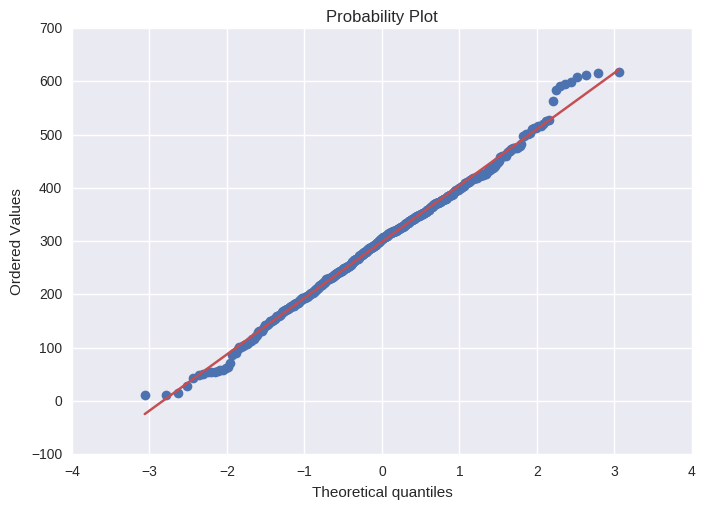

rSquared of 0.997935858369 isn't bad


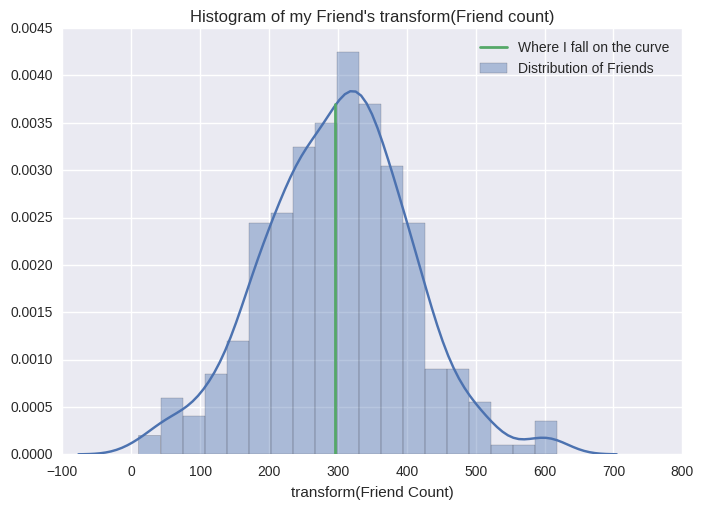

0.488736642758


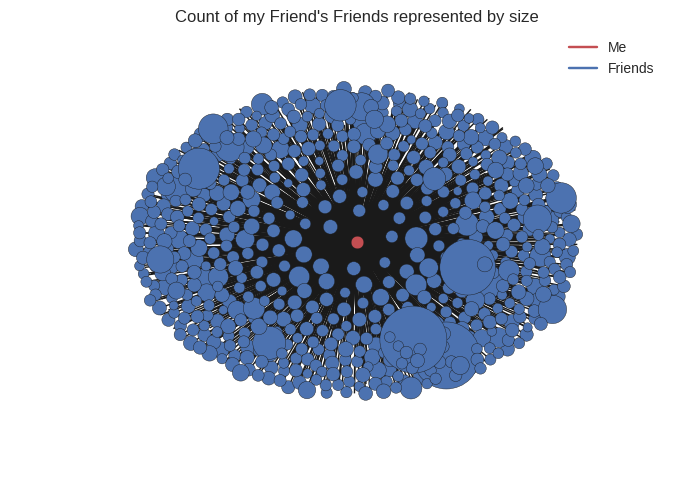

In [1]:
import seaborn as sns
from friends import friends
import math
import pylab
from scipy.stats import probplot, norm
import networkx as nx
sns.set(color_codes=True)

# Massage data into Gaussian form
transform = lambda x: math.log(x) ** 3
gaussian = map(transform, friends)
mine = 784
mapped = transform(mine)

# Check how Gaussian our result is
_, (_, _, rSquared) = probplot(gaussian, dist='norm', plot=pylab)
pylab.show()
# Ideally high correlation (above .99 rSquared)
print "rSquared of " + str(rSquared) + " isn't bad"

# Calculate where I fal on the bell curve
count = len(gaussian)
mean = sum(gaussian)/count
std = math.sqrt(sum([(x - mean)**2 for x in gaussian])/count)

# Plot it up
sns.distplot(gaussian, label='Distribution of Friends')
sns.plt.plot([mapped, mapped], [0, 0.0037], linewidth=2, label='Where I fall on the curve')
legend = sns.plt.legend()
sns.plt.ylabel('')
sns.plt.xlabel('transform(Friend Count)')
sns.plt.title('Histogram of my Friend\'s transform(Friend count)')
sns.plt.show()

z = (mapped - mean)/std
print(1 - norm.sf(z))


# Build our graph
G = nx.Graph()
G.add_node(0)
for i, value in enumerate(gaussian):
    G.add_node(i+1)
    G.add_edge(0,i+1)

# Scale each node to size by some normalization factor
m = max(gaussian)*40

f = sns.plt.figure(1)
ax = f.add_subplot(1,1,1)
ax.plot([0],[0],color='r',label='Me')
ax.plot([0],[0],color='b',label='Friends')

# Add the central connected node as red and the surrounding as blue
nx.draw(G, nodelist=[0], node_size=[m/mapped], node_color='r')
nx.draw(G, nodelist=range(1,len(gaussian)), node_size=[m/x for x in gaussian], node_color='b')
sns.plt.title("Count of my Friend's Friends represented by size")
sns.plt.legend()
sns.plt.show()